In [327]:
%pip install imblearn
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install scipy
%pip install seaborn
%pip install shap
%pip install tensorflow
%pip install ucimlrepo 
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [363]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
from imblearn.over_sampling import SMOTE
from scipy import stats
from scipy.stats import uniform
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from tensorflow import keras
from tensorflow.keras import layers

In [329]:
# Taiwanese Bankruptcy Prediction [Dataset]. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5004D.
df = pd.read_csv('data.csv')

display(df)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [ ]:
duplicates = df.duplicated()

print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [331]:
missing_values = df.isnull().sum()

print(f"Total number of missing values: {missing_values.sum()}")

Total number of missing values: 0


In [332]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['Bankrupt?']))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[1:])
df_scaled['Bankrupt?'] = df['Bankrupt?'].values

df = df_scaled
display(df)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,...,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,0.0,-0.622067,1
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,...,-0.049491,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,0.0,-0.535573,1
2,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086566,...,-0.049491,-0.005984,-0.383698,-0.249820,0.679247,-0.062961,-0.125015,0.0,-0.621960,1
3,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.024491,-0.011077,...,-0.049491,-0.080226,-1.441526,-0.392864,0.093765,-0.053903,-0.052562,0.0,-0.471826,1
4,-0.661778,-0.307745,-0.508050,-0.541238,-0.540708,0.016758,0.013703,0.016186,-0.013254,0.013300,...,-0.049491,-0.032052,-0.541255,-0.029564,-0.128014,-0.178037,0.776395,0.0,-0.241715,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,-0.189395,-0.291959,-0.168181,-0.206277,-0.204969,0.018215,0.017036,0.018197,-0.010092,0.016277,...,-0.049491,-0.024011,-0.206217,-0.002968,-0.052524,-0.030437,0.063215,0.0,-0.353693,0
6815,-0.494676,-0.310237,-0.477627,-0.569328,-0.568828,0.018223,0.017455,0.017919,-0.009248,0.016145,...,-0.049491,0.001317,-0.569333,-0.006633,-0.154404,-0.033992,0.049970,0.0,-0.185856,0
6816,-0.534845,-0.379194,-0.534996,0.147411,0.135029,0.017628,0.016412,0.017153,-0.009919,0.013012,...,-0.049491,0.019653,0.147305,-0.018166,-0.316446,-0.047870,-0.015101,0.0,1.001206,0
6817,0.017875,0.019594,0.007403,-0.005811,-0.004720,0.024494,0.024099,0.023223,-0.011175,0.022233,...,-0.049491,0.003493,-0.005931,0.046934,-0.194852,-0.045898,-0.004270,0.0,-0.071364,0


In [ ]:
z_scores = stats.zscore(df.drop(columns=['Bankrupt?']))
mask = (abs(z_scores) < 3).all(axis=1)
df_no_outliers = df[mask]
num_values_no_outliers = df_no_outliers.size
print(f"Number of values in df_no_outliers: {num_values_no_outliers}")

Number of values in df_no_outliers: 0


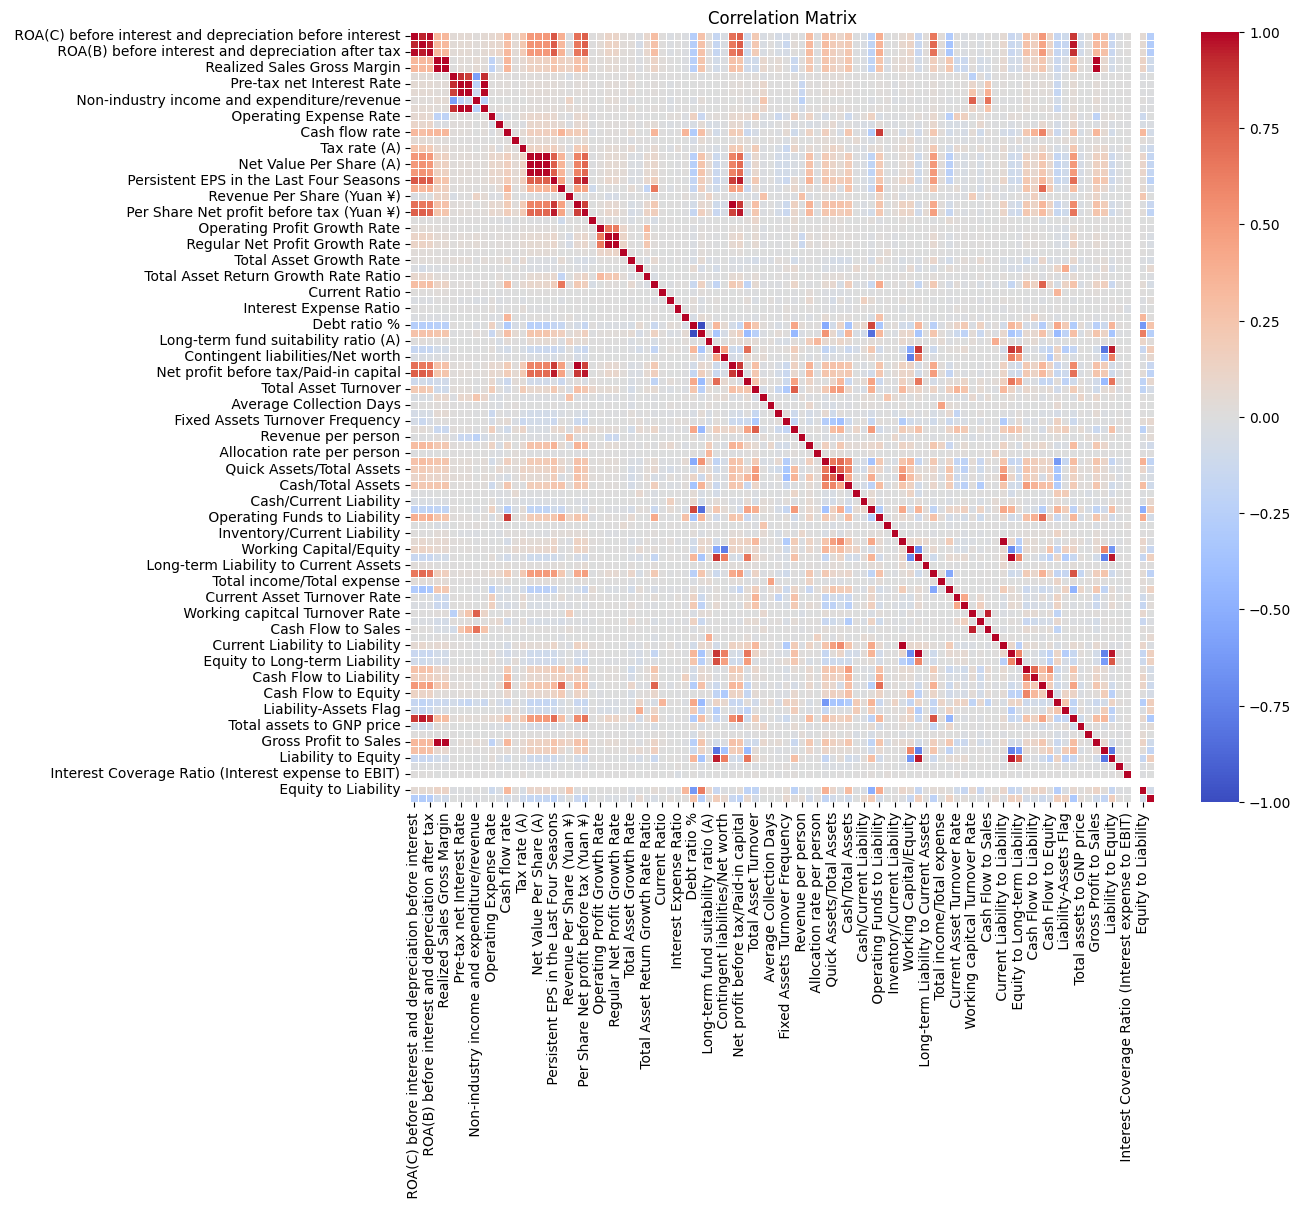

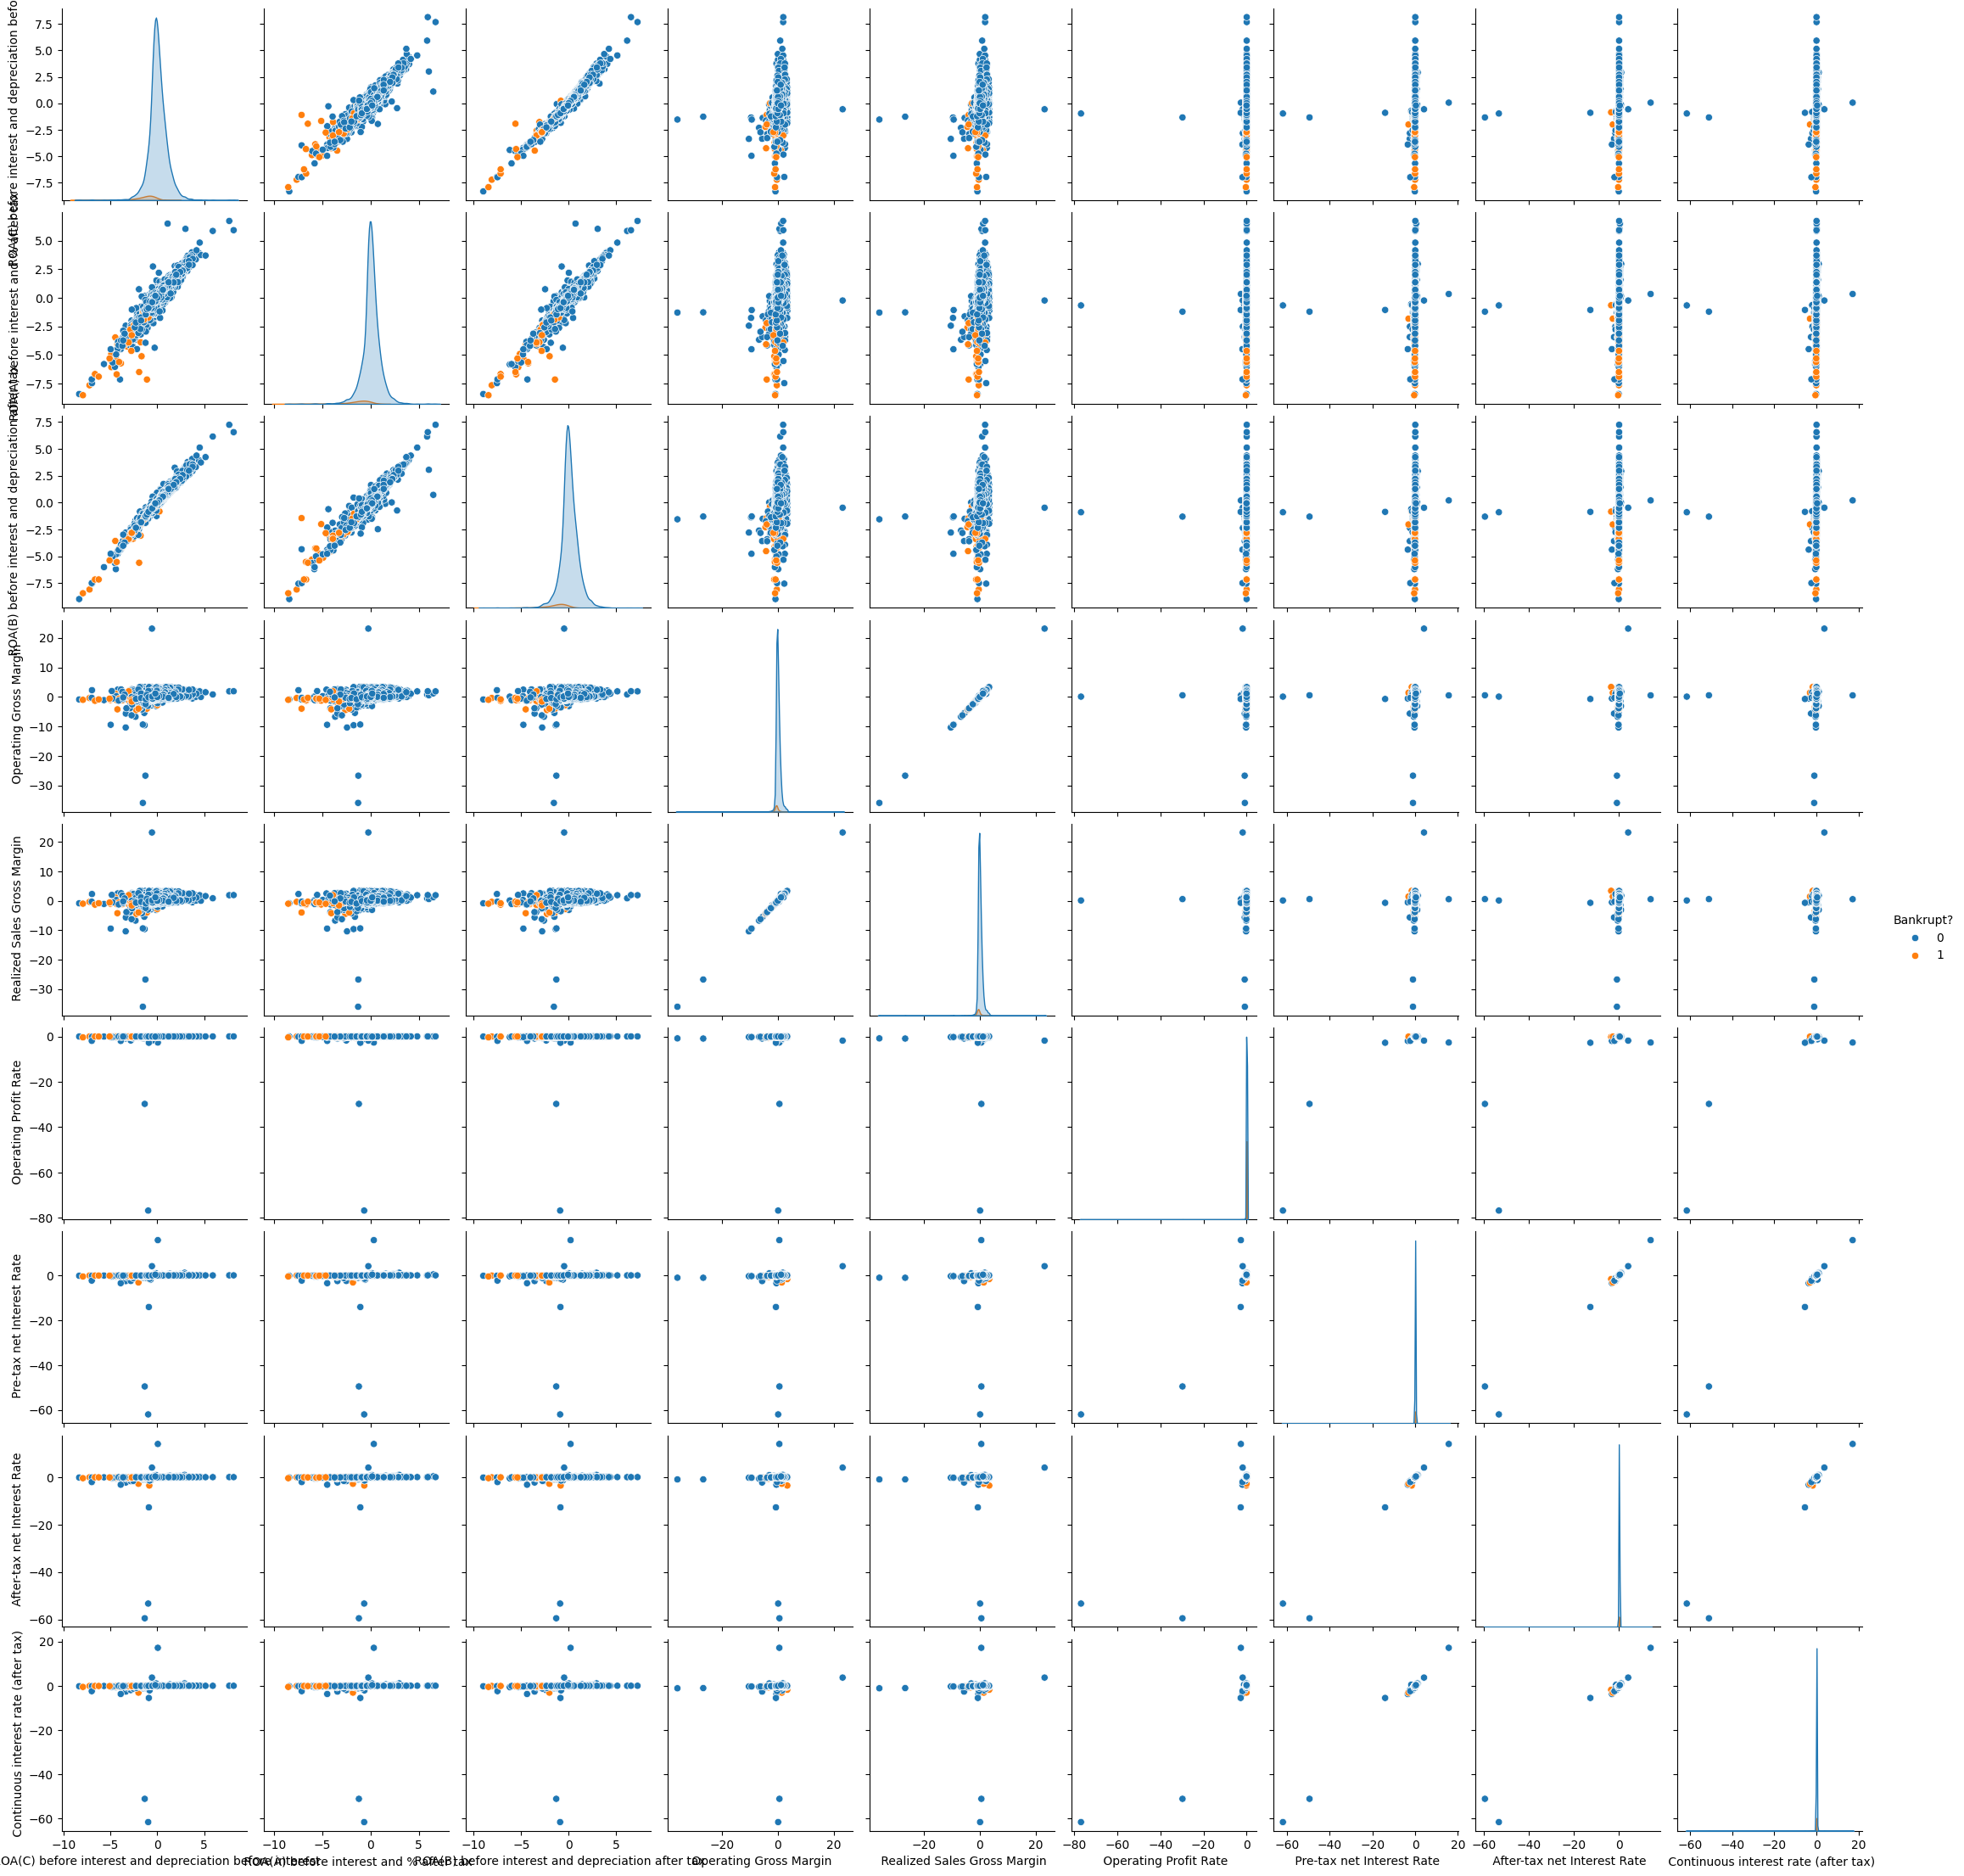

In [334]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

important_features = [' ROA(C) before interest and depreciation before interest', 
                      ' ROA(A) before interest and % after tax', 
                      ' ROA(B) before interest and depreciation after tax', 
                      ' Operating Gross Margin', 
                      ' Realized Sales Gross Margin', 
                      ' Operating Profit Rate', 
                      ' Pre-tax net Interest Rate', 
                      ' After-tax net Interest Rate', 
                      ' Continuous interest rate (after tax)']

sns.pairplot(df[important_features + ['Bankrupt?']], hue='Bankrupt?', diag_kind='kde')
plt.show()

In [335]:
X = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']

display(X)
display(y)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,...,-2.254317,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,0.0,-0.622067
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,...,-0.309033,-0.049491,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,0.0,-0.535573
2,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086566,...,-0.820510,-0.049491,-0.005984,-0.383698,-0.249820,0.679247,-0.062961,-0.125015,0.0,-0.621960
3,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.024491,-0.011077,...,-1.691222,-0.049491,-0.080226,-1.441526,-0.392864,0.093765,-0.053903,-0.052562,0.0,-0.471826
4,-0.661778,-0.307745,-0.508050,-0.541238,-0.540708,0.016758,0.013703,0.016186,-0.013254,0.013300,...,-0.316008,-0.049491,-0.032052,-0.541255,-0.029564,-0.128014,-0.178037,0.776395,0.0,-0.241715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,-0.189395,-0.291959,-0.168181,-0.206277,-0.204969,0.018215,0.017036,0.018197,-0.010092,0.016277,...,-0.194231,-0.049491,-0.024011,-0.206217,-0.002968,-0.052524,-0.030437,0.063215,0.0,-0.353693
6815,-0.494676,-0.310237,-0.477627,-0.569328,-0.568828,0.018223,0.017455,0.017919,-0.009248,0.016145,...,-0.198659,-0.049491,0.001317,-0.569333,-0.006633,-0.154404,-0.033992,0.049970,0.0,-0.185856
6816,-0.534845,-0.379194,-0.534996,0.147411,0.135029,0.017628,0.016412,0.017153,-0.009919,0.013012,...,-0.247517,-0.049491,0.019653,0.147305,-0.018166,-0.316446,-0.047870,-0.015101,0.0,1.001206
6817,0.017875,0.019594,0.007403,-0.005811,-0.004720,0.024494,0.024099,0.023223,-0.011175,0.022233,...,0.100366,-0.049491,0.003493,-0.005931,0.046934,-0.194852,-0.045898,-0.004270,0.0,-0.071364


0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

In [336]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [337]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Random Forest

In [338]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [339]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [340]:
y_pred_rf = rf_classifier.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
recall_rf = conf_matrix_rf[1, 1] / (conf_matrix_rf[1, 0] + conf_matrix_rf[1, 1])
report_rf = classification_report(y_test, y_pred_rf)

print(f'Accuracy: {accuracy_rf:.4f}')
print('Confusion Matrix:\n', conf_matrix_rf, '\n')
print(f'Recall: {recall_rf:.4f}')
print('Classification Report:\n', report_rf)

Accuracy: 0.9707
Confusion Matrix:
 [[1315    5]
 [  35    9]] 

Recall: 0.2045
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1320
           1       0.64      0.20      0.31        44

    accuracy                           0.97      1364
   macro avg       0.81      0.60      0.65      1364
weighted avg       0.96      0.97      0.96      1364



In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

rf_classifier = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42, class_weight='balanced')

rf_classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=300,
                       random_state=42)

In [343]:
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

threshold = 0.3
y_pred_adjusted_rf = (y_pred_prob_rf >= threshold).astype(int)

In [344]:
accuracy_adjusted_rf = accuracy_score(y_test, y_pred_adjusted_rf)
recall_adjusted_rf = recall_score(y_test, y_pred_adjusted_rf)

print(f'Adjusted Random Forest Accuracy: {accuracy_adjusted_rf:.4f}')
print(f'Adjusted Random Forest Recall: {recall_adjusted_rf:.4f}')

Adjusted Random Forest Accuracy: 0.8878
Adjusted Random Forest Recall: 0.8182


In [ ]:
rf_feature_importances = pd.DataFrame({
	'Feature': X.columns,
	'Importance': rf_classifier.feature_importances_
})

ranked_features = rf_feature_importances.sort_values(by='Importance', ascending=False)
display(ranked_features)

,Feature,Importance
39,Borrowing dependency,0.081510
9,Continuous interest rate (after tax),0.045926
18,Persistent EPS in the Last Four Seasons,0.044339
7,After-tax net Interest Rate,0.044156
85,Net Income to Total Assets,0.043825
...,...,...
20,Revenue Per Share (Yuan ¥),0.000005
57,Quick Assets/Current Liability,0.000005
50,Revenue per person,0.000002
29,Net Value Growth Rate,0.000000


### Feedforward Neural-Network

In [346]:
fnn_model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),  
    layers.Dropout(0.3),  
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

c:\Users\maxym\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [347]:
fnn_model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [348]:
history = fnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7962 - loss: 0.4236 - val_accuracy: 0.9643 - val_loss: 0.1128
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9691 - loss: 0.1003 - val_accuracy: 0.9688 - val_loss: 0.1061
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9717 - loss: 0.0873 - val_accuracy: 0.9688 - val_loss: 0.1016
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9721 - loss: 0.0812 - val_accuracy: 0.9661 - val_loss: 0.1078
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9677 - loss: 0.0962 - val_accuracy: 0.9679 - val_loss: 0.1123
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9741 - loss: 0.0749 - val_accuracy: 0.9670 - val_loss: 0.1032
Epoch 7/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9743 - loss: 0.0754 - val_accuracy: 0.9661 - val_loss: 0.1052
Epoch 8/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9782 - loss: 0.0630 - val_accuracy: 0.

In [349]:
y_pred_prob = fnn_model.predict(X_test)
y_pred_fnn = (y_pred_prob > 0.5).astype(int)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [350]:
accuracy_fnn = accuracy_score(y_test, y_pred_fnn)
conf_matrix_fnn = confusion_matrix(y_test, y_pred_fnn)
report_fnn = classification_report(y_test, y_pred_fnn)

print(f"Accuracy: {accuracy_fnn:.4f}")
print("Confusion Matrix:\n", conf_matrix_fnn)
print("Classification Report:\n", report_fnn)

Accuracy: 0.9582
Confusion Matrix:
 [[1301   19]
 [  38    6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1320
           1       0.24      0.14      0.17        44

    accuracy                           0.96      1364
   macro avg       0.61      0.56      0.58      1364
weighted avg       0.95      0.96      0.95      1364



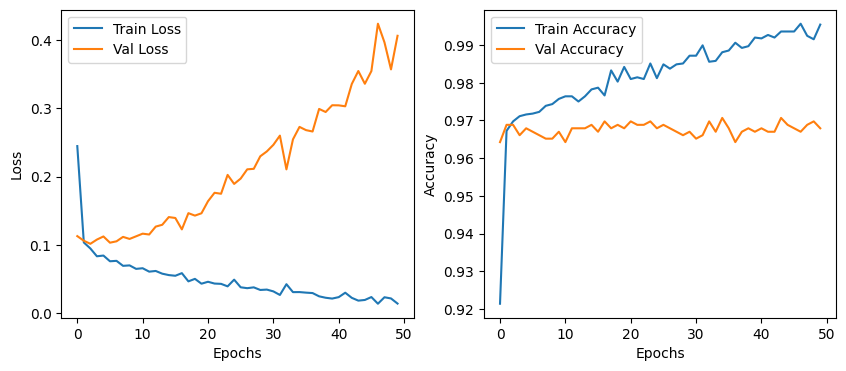

In [351]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

PermutationExplainer explainer: 1365it [03:15,  6.72it/s]                          


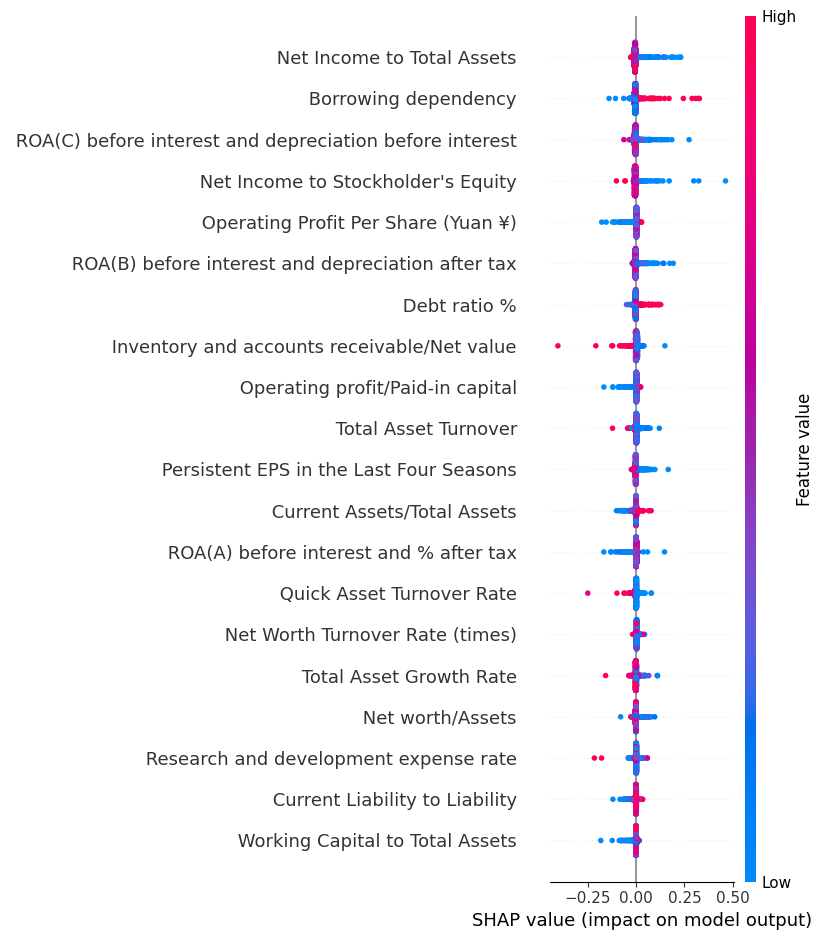

In [352]:
explainer = shap.Explainer(fnn_model, X_train) 
shap_values = explainer(X_test) 

shap.summary_plot(shap_values, X_test, feature_names=df.columns[:-1])

In [353]:
smote = SMOTE(random_state=42)
X_train_resampled_fnn, y_train_resampled_fnn = smote.fit_resample(X_train, y_train)

# Define the FNN model
fnn_model_resampled = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(X_train_resampled_fnn.shape[1],)),  
    layers.Dropout(0.3),  
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model@
fnn_model_resampled.compile(optimizer="adam",
                            loss="binary_crossentropy",
                            metrics=["accuracy"])

# Train the model with the resampled data
history_resampled = fnn_model_resampled.fit(X_train_resampled_fnn, y_train_resampled_fnn, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

c:\Users\maxym\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8379 - loss: 0.3934 - val_accuracy: 0.9432 - val_loss: 0.2104
Epoch 2/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9111 - loss: 0.2271 - val_accuracy: 0.9806 - val_loss: 0.1144
Epoch 3/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9298 - loss: 0.1784 - val_accuracy: 0.9905 - val_loss: 0.1002
Epoch 4/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9450 - loss: 0.1461 - val_accuracy: 0.9891 - val_loss: 0.0990
Epoch 5/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9552 - loss: 0.1264 - val_accuracy: 0.9967 - val_loss: 0.0609
Epoch 6/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9635 - loss: 0.1002 - val_accuracy: 0.9938 - val_loss: 0.0463
Epoch 7/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9690 - loss: 0.0910 - val_accuracy: 0.9972 - val_loss: 0.0400
Epoch 8/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9772 - loss: 0.0726 - val_accuracy: 1.

In [354]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

best_threshold = thresholds[np.argmax(recall - precision)]
print(f"Optimal Threshold: {best_threshold:.2f}")

y_pred_adjusted = (y_pred_prob > best_threshold).astype(int)
print(classification_report(y_test, y_pred_adjusted))

Optimal Threshold: 0.00
              precision    recall  f1-score   support

           0       0.99      0.13      0.22      1320
           1       0.04      0.95      0.07        44

    accuracy                           0.15      1364
   macro avg       0.51      0.54      0.15      1364
weighted avg       0.96      0.15      0.22      1364



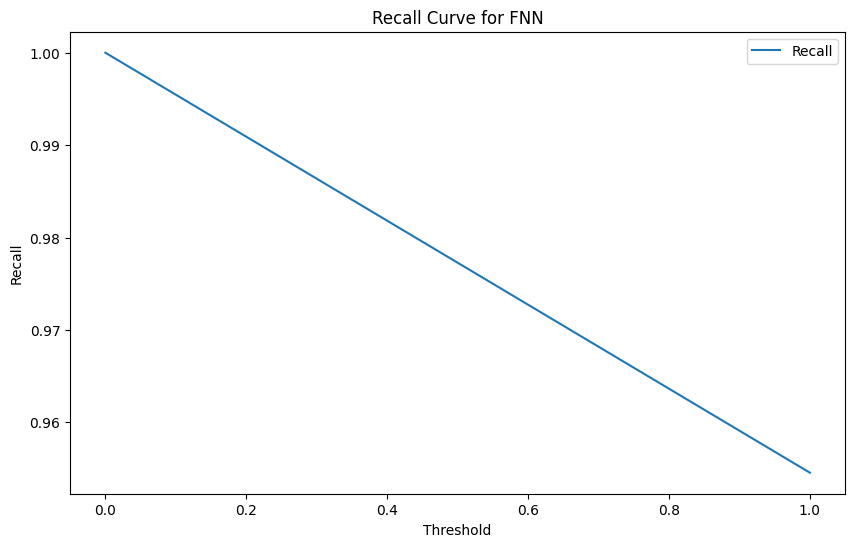

In [355]:
precision_fnn, recall_fnn, thresholds_fnn = precision_recall_curve(y_test, y_pred_adjusted)

plt.figure(figsize=(10, 6))
plt.plot(thresholds_fnn, recall_fnn[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall Curve for FNN')
plt.legend()
plt.show()

### Gradient Boosting

In [356]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [357]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)

print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")
print("Confusion Matrix:\n", conf_matrix_gb)
print("Classification Report:\n", report_gb)

Gradient Boosting Accuracy: 0.9736
Confusion Matrix:
 [[1313    7]
 [  29   15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1320
           1       0.68      0.34      0.45        44

    accuracy                           0.97      1364
   macro avg       0.83      0.67      0.72      1364
weighted avg       0.97      0.97      0.97      1364



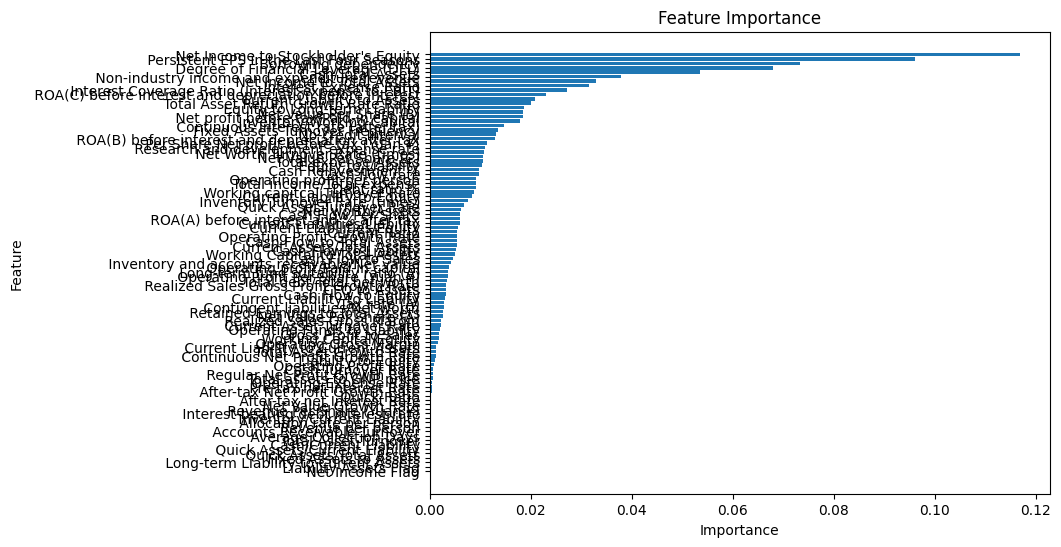

In [ ]:
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": gb_model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [359]:
gb_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
})

ranked_gb_features = gb_feature_importances.sort_values(by='Importance', ascending=False)
display(ranked_gb_features)

,Feature,Importance
89,Net Income to Stockholder's Equity,0.116902
18,Persistent EPS in the Last Four Seasons,0.096074
39,Borrowing dependency,0.073241
91,Degree of Financial Leverage (DFL),0.067980
56,Cash/Total Assets,0.053560
...,...,...
54,Quick Assets/Total Assets,0.000000
75,Fixed Assets to Assets,0.000000
66,Long-term Liability to Current Assets,0.000000
84,Liability-Assets Flag,0.000000


In [365]:
param_distributions = {
    'n_estimators': [50, 100, 200],
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    gb_model, param_distributions, n_iter=20, cv=3, random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

y_pred = random_search.best_estimator_.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred)
print(f"Optimized Accuracy: {accuracy_gb:.2f}")

Best Parameters: {'learning_rate': np.float64(0.011326496115986653), 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Optimized Accuracy: 0.97


### Logistic Regression

In [366]:
log_reg = LogisticRegression(solver="liblinear", class_weight="balanced", random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [367]:
accuracy_log = accuracy_score(y_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
report_log = classification_report(y_test, y_pred_log)

print(f"Logistic Regression Accuracy: {accuracy_log:.4f}")
print("Confusion Matrix:\n", conf_matrix_log)
print("Classification Report:\n", report_log)

Logistic Regression Accuracy: 0.8805
Confusion Matrix:
 [[1165  155]
 [   8   36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1320
           1       0.19      0.82      0.31        44

    accuracy                           0.88      1364
   macro avg       0.59      0.85      0.62      1364
weighted avg       0.97      0.88      0.91      1364



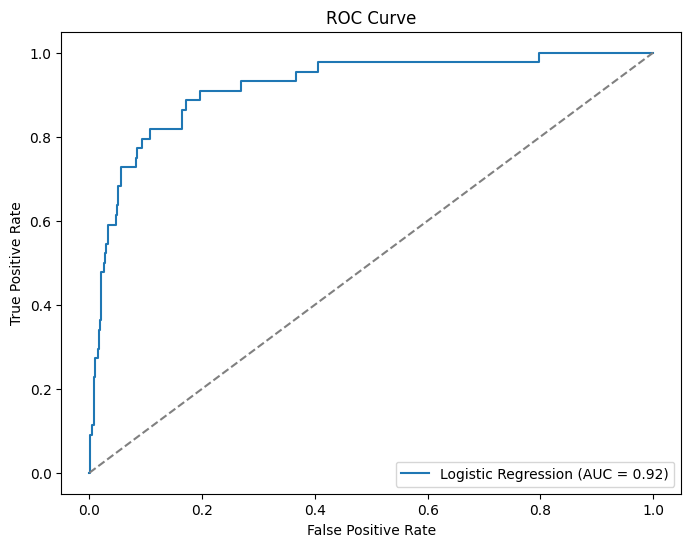

In [ ]:
y_probs = log_reg.predict_proba(X_test)[:, 1]  

fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, y_probs)))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray") 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [369]:
coefficients = log_reg.coef_[0]

lr_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': coefficients
})

ranked_lr_features = lr_feature_importances.sort_values(by='Importance', ascending=False)
display(ranked_lr_features)

,Feature,Importance
39,Borrowing dependency,1.644021
35,Total debt/Total net worth,0.933545
1,ROA(A) before interest and % after tax,0.931082
41,Operating profit/Paid-in capital,0.877414
36,Debt ratio %,0.858414
...,...,...
85,Net Income to Total Assets,-1.276682
32,Current Ratio,-1.518019
94,Equity to Liability,-1.615997
90,Liability to Equity,-1.811834


### Support Vector Machine

In [370]:
svm = SVC(kernel="linear", C=1.0, probability=True, random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [371]:
y_probs_svm = svm.predict_proba(X_test)[:, 1]
y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Logistic Regression Accuracy: {accuracy_svm:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Logistic Regression Accuracy: 0.9670
Confusion Matrix:
 [[1315    5]
 [  40    4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.44      0.09      0.15        44

    accuracy                           0.97      1364
   macro avg       0.71      0.54      0.57      1364
weighted avg       0.95      0.97      0.96      1364



In [372]:
coefficients_svm = svm.coef_[0]

svm_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': coefficients_svm
})

ranked_svm_features = svm_feature_importances.sort_values(by='Importance', ascending=False)
display(ranked_svm_features)

,Feature,Importance
17,Net Value Per Share (C),0.485371
35,Total debt/Total net worth,0.391869
1,ROA(A) before interest and % after tax,0.388631
5,Operating Profit Rate,0.324239
72,Working capitcal Turnover Rate,0.308383
...,...,...
80,Cash Flow to Liability,-0.331147
8,Non-industry income and expenditure/revenue,-0.441726
85,Net Income to Total Assets,-0.581751
94,Equity to Liability,-0.628784


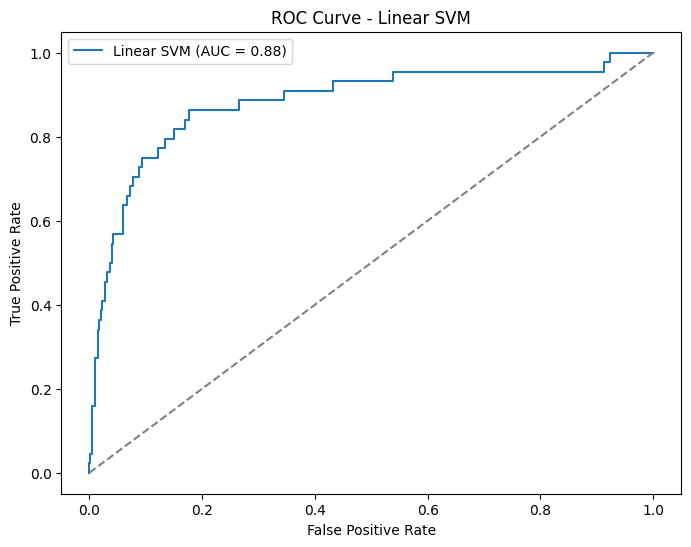

In [373]:
fpr, tpr, _ = roc_curve(y_test, y_probs_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Linear SVM (AUC = {:.2f})".format(roc_auc_score(y_test, y_probs_svm)))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Linear SVM")
plt.legend()
plt.show()

### Comparisons

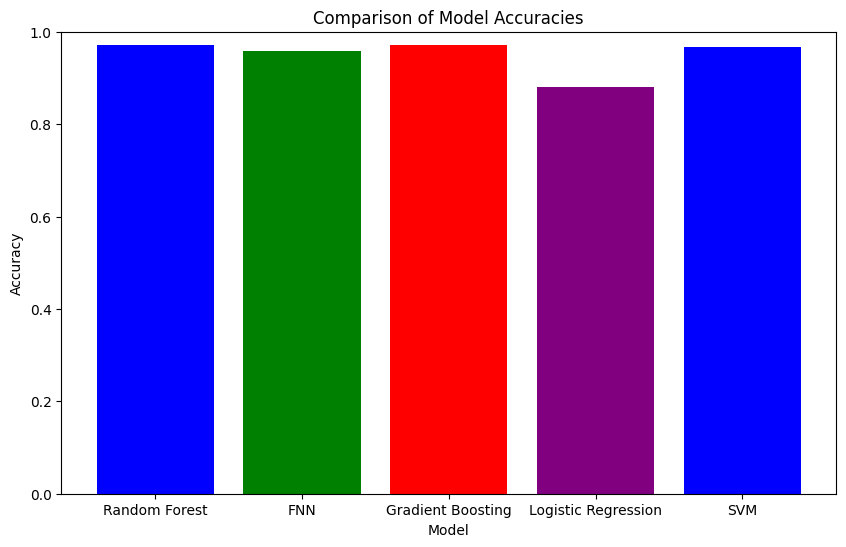

In [ ]:
model_names = ['Random Forest', 'FNN', 'Gradient Boosting', 'Logistic Regression', 'SVM']
accuracies = [accuracy_rf, accuracy_fnn, accuracy_gb, accuracy_log, accuracy_svm]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.show()

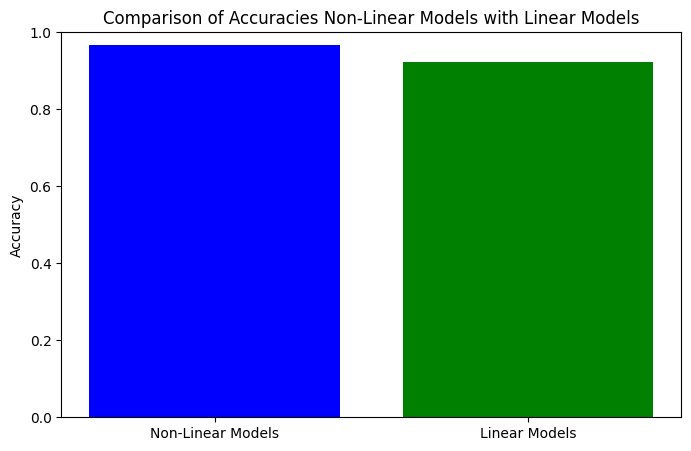

Mean accuracy of Non-Linear Models: 0.9670
Mean accuracy of Linear Models: 0.9238


In [376]:
average_accuracy_rf_fnn_gb = (accuracy_rf + accuracy_fnn + accuracy_gb) / 3
average_accuracy_svm_log = (accuracy_svm + accuracy_log) / 2

plt.figure(figsize=(8, 5))
plt.bar(['Non-Linear Models', 'Linear Models'], [average_accuracy_rf_fnn_gb, average_accuracy_svm_log], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies Non-Linear Models with Linear Models')
plt.ylim(0, 1)
plt.show()

print(f'Mean accuracy of Non-Linear Models: {average_accuracy_rf_fnn_gb:.4f}')
print(f'Mean accuracy of Linear Models: {average_accuracy_svm_log:.4f}')